In [1]:
#!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
#!unzip dino-dragon.zip

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.5.0'

In [4]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [5]:
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
#is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))
print(gpu_available,is_cuda_gpu_available)

tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.keras.preprocessing.image import load_img

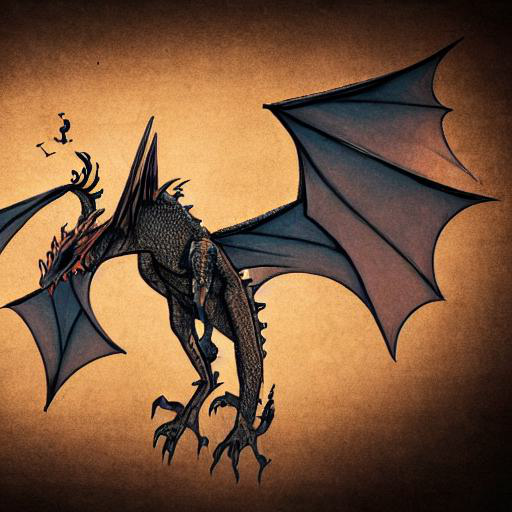

In [7]:
path = './train/dragon'
name = '00af6fd7-5484-4e59-b974-761a5c36a16e.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
image_size = (150, 150)
batch_size = 32

In [10]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 1594 images belonging to 2 classes.


In [11]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [12]:
X,y = next(train_ds)

In [13]:
X.shape

(32, 150, 150, 3)

In [14]:
y[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [15]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 394 images belonging to 2 classes.


In [16]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False
)

base_model.trainable = False

In [17]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
#two lines can bereplaced with one
#pooling = keras.layers.GlobalAveragePooling2D()
#vectors = pooling(base)
vector = keras.layers.GlobalAveragePooling2D()(base)
#outputs = vector
outputs = keras.layers.Dense(2)(vector)

model = keras.Model(inputs, outputs)

In [18]:
preds = model.predict(X)

In [19]:
preds.shape

(32, 2)

In [20]:
preds[0]

array([-0.03360167,  0.4927648 ], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Model Architecture

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model Optimizer

In [18]:
epochs = 10
optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer, metrics=['accuracy']
)

<div class="alert alert-block alert-success">
<b>Answer for Question 1 is </b> 'binary_crossentropy'
</div>

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 8s 139ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 7s 131ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 7s 137ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 7s 134ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 7s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 7s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________
None


<div class="alert alert-block alert-success">
<b>Answer for Question 2 is </b> 11,215,873
</div>

In [21]:
train_gen34 = ImageDataGenerator(rescale=1./255)
batch_size = 20

train_ds34 = train_gen34.flow_from_directory(
    "train",
    shuffle=True, # by default
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen34 = ImageDataGenerator(rescale=1./255)

val_ds34 = val_gen34.flow_from_directory(
    "test",
    shuffle=True, # by default
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


# Checkpointing

In [22]:
model.save_weights('model_v1.h5', save_format='h5') # model.save() - saves the whole model

In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'cnn_v1_{epoch:02d}.h5',
    save_freq='epoch',
    save_best_only=False,
    monitor='val_accuracy',
    mode='max'
)

In [24]:
history = model.fit(
    train_ds34,
    epochs=10,
    validation_data=val_ds34,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - 7s 84ms/step - loss: 0.6007 - accuracy: 0.6675 - val_loss: 0.4670 - val_accuracy: 0.8553
Epoch 2/10
80/80 [==============================] - 7s 84ms/step - loss: 0.4457 - accuracy: 0.8149 - val_loss: 0.3779 - val_accuracy: 0.8503
Epoch 3/10
80/80 [==============================] - 7s 84ms/step - loss: 0.3700 - accuracy: 0.8369 - val_loss: 0.3399 - val_accuracy: 0.8706
Epoch 4/10
80/80 [==============================] - 7s 86ms/step - loss: 0.3196 - accuracy: 0.8714 - val_loss: 0.3166 - val_accuracy: 0.8706
Epoch 5/10
80/80 [==============================] - 7s 86ms/step - loss: 0.3067 - accuracy: 0.8783 - val_loss: 0.3644 - val_accuracy: 0.8401
Epoch 6/10
80/80 [==============================] - 7s 85ms/step - loss: 0.2505 - accuracy: 0.9090 - val_loss: 0.2924 - val_accuracy: 0.8858
Epoch 7/10
80/80 [==============================] - 7s 89ms/step - loss: 0.2624 - accuracy: 0.8934 - val_loss: 0.2836 - val_accuracy: 0.8883
Epoch 8/10
80

In [25]:
from statistics import median

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

print(median(train))

0.8858218193054199


<div class="alert alert-block alert-success">
<b>Answer for Question 3 is </b> 0.9
</div>

In [26]:
from statistics import stdev

tr_loss = history.history['loss']
print(stdev(tr_loss))

0.13744030320690867


<div class="alert alert-block alert-success">
<b>Answer for Question 4 is </b> 0.11
</div>

In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def make_model(epochs=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    epochs = epochs
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizer, metrics=['accuracy']
    )
    
    return model

In [3]:
image_size = (150, 150)
batch_size = 32

In [4]:
train_gen56 = ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest'
                                )
batch_size = 20

train_ds56 = train_gen56.flow_from_directory(
    "train",
    shuffle=True, # by default
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen56 = ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest'
                                )

val_ds56 = val_gen56.flow_from_directory(
    "test",
    shuffle=True, # by default
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [5]:
model = make_model()

In [6]:
model.evaluate(train_ds56)

80/80 [==============================] - 11s 130ms/step - loss: 0.6965 - accuracy: 0.5188


[0.6965178847312927, 0.518820583820343]

In [7]:
checkpoint_filepath = 'cnn_v1_10.h5'

model.load_weights(checkpoint_filepath)

In [8]:
#model.save_weights('model_v2.h5', save_format='h5') # model.save() - saves the whole model

In [9]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'cnn_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_freq='epoch',
    save_best_only=False,
    monitor='val_accuracy',
    mode='max'
)

In [10]:
history = model.fit(
    train_ds56,
    epochs=10,
    validation_data=val_ds56,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - 17s 204ms/step - loss: 0.4259 - accuracy: 0.7980 - val_loss: 0.3912 - val_accuracy: 0.8274
Epoch 2/10
80/80 [==============================] - 19s 244ms/step - loss: 0.3991 - accuracy: 0.8243 - val_loss: 0.3848 - val_accuracy: 0.8325
Epoch 3/10
80/80 [==============================] - 18s 228ms/step - loss: 0.4009 - accuracy: 0.8174 - val_loss: 0.4234 - val_accuracy: 0.7970
Epoch 4/10
80/80 [==============================] - 17s 207ms/step - loss: 0.3766 - accuracy: 0.8312 - val_loss: 0.3778 - val_accuracy: 0.8198
Epoch 5/10
80/80 [==============================] - 14s 172ms/step - loss: 0.3685 - accuracy: 0.8363 - val_loss: 0.3735 - val_accuracy: 0.8223
Epoch 6/10
80/80 [==============================] - 15s 191ms/step - loss: 0.3514 - accuracy: 0.8432 - val_loss: 0.4852 - val_accuracy: 0.7792
Epoch 7/10
80/80 [==============================] - 15s 191ms/step - loss: 0.3453 - accuracy: 0.8463 - val_loss: 0.3846 - val_accuracy: 0.8223

In [11]:
from statistics import mean

val_loss = history.history['val_loss']
print(mean(val_loss))

0.37699388563632963


<div class="alert alert-block alert-success">
<b>Answer for Question 5 is </b> 0.37
</div>

In [12]:
val_acc = history.history['val_accuracy']
print(mean(val_acc[5:]))

0.8456852674484253


<div class="alert alert-block alert-success">
<b>Answer for Question 6 is </b> 0.84
</div>